For each mouse
1. (Manual) Find summary excel file, extract names of green and yellow sessions
2. VidsDCIMG = Find video files, one for each trial
3. refImg = Find reference image
4. trialTypes = Find trial types
5. t1.mat, t2.mat = Find warping files 
6. allenBrain = Find allen brain map

Processing:
1. Testing_A:
    * For each mouse, load ::: refImg, t1.mat, allenBrain
      * Gallero\SDT-TDT\overlay\mou_9
        - L_modified (brain areas for all mice) ::: Gallero\SDT-TDT\overlay\mou_9/L_modified.mat
        - RefImg ::: Gallero\SDT-TDT\overlay\mou_9\refImg_ROIs.mat
    * For each session, load ::: t2.mat
      - Gallero/mou_9/TDT/20180315/widefield_labview/ROI_Allen/registration_transform_1510.mat
    * Apply transform to refImg, overplot allenBrain, check that they align
2. Testing_B:
    * Load all trial videos
        - Gallero\mou_9\TDT\20180301\widefield_labview
    * Compute time-average images
    * Apply same as Testing_A
    * Plot a few random sessions
3. Process real data - for each session:
    * Provide list of sessions to analyze
    * Provide root folder to mouse data
    * Provide root folder to overlay data
    * Videos
        * Load all trial videos
        * Apply transformation
        * Apply allen map to extract activities, average over pixels
        * Store in HDF5
    * Trial Intervals:
        * Load trial interval file
          - Gallero\mou_9\TDT\20180301\widefield_labview\a\Matt_files\20180301a.mat
        * Store 3rd column to HDF5
    * Trial Types:
        * Load trial type file
          - \Gallero\mou_9\TDT\20180301\widefield_labview\a\Matt_files/trials_ind.mat
        * Parse, store to HDF5
4. Postprocess datatypes
    * Read HDF5
    * Merge trials for each session
    * Calc times from intervals
    * Apply polyfit, look
    * Perform DFF, store


Notes:

* Matlab Fitting routines
   - t1= align to mapping day (functional); aligns every day to a common day.
   - t2= aligns the common day to Allen institue

`
tform = fitgeotrans(movingPoints,fixedPoints,'polynomial',3);
Jregistered = imwarp(refImg*7000,tform,'OutputView',imref2d(size(A_scaled))); %aligned map
`

**TODO**:
* Compare TrialTypes to to trial_idx.m where applicable, otherwise trial_error.m
* Compare resulting bn_trial with what Yasir got

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fpath

from lib.gallegosalas.preprocess_raw import preprocess


%load_ext autoreload
%autoreload 2

Appended root directory /media/aleksejs/DataHDD/work/codes/comp-neuro/analysis-mesoscopic/pub-2020-exploratory-analysis


In [2]:
FPS = 20  # Hz
mice = ['mou_9', 'mou_6', 'mou_7', 'mou_5']
extra_mice = ['mou_15_Ariel', 'mou_18_Ariel']

In [3]:
# pathTGT = gui_fpath('root path to TGT')
pathTGT = '/run/user/1000/gvfs/smb-share:server=130.60.51.15,share=neurophysiology-storage2/Gallero'

In [4]:
# pathOverlay = gui_fpath('root path to overlay')
pathOverlay = '/run/user/1000/gvfs/smb-share:server=130.60.51.15,share=neurophysiology-storage2/Gallero/SDT-TDT/overlay'

In [5]:
# pathPreferences = gui_fpath('root path to overlay')
# pathPreferences = '/media/alyosha/Data/TE_data/yasirdata_raw'
pathPreferences = '/media/aleksejs/DataHDD/work/data/yasir/yasirdata_raw'

In [6]:
pathDict = {
    'TGT' : pathTGT,
    'Overlay' : pathOverlay,
    'Preferences' : pathPreferences
}

In [7]:
prep = preprocess(pathDict)

# 1. Test transform on Ref files

/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/pymatreader/utils.py:213: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


mou_5


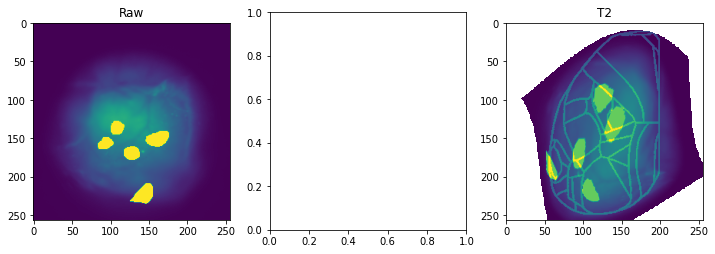

mou_6


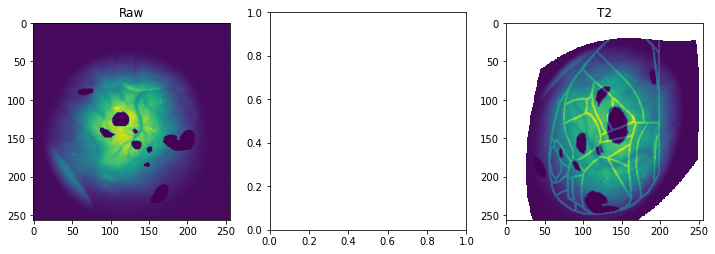

mou_7


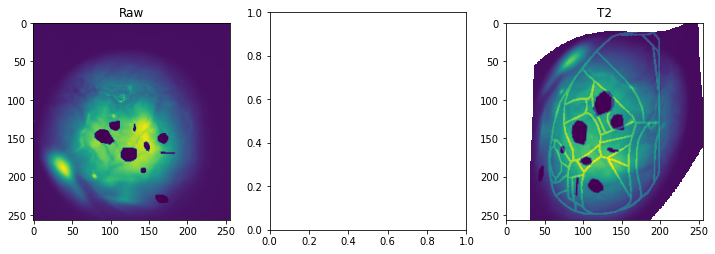

mou_9


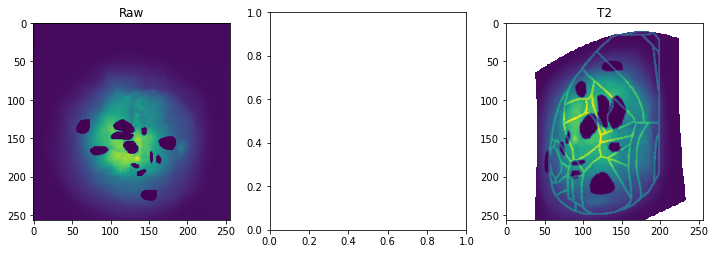

In [8]:
for mouseName, pathRef in prep.pathRef.items():
    img = prep.load_ref_img(pathRef)
    t2 = prep.load_t2(prep.pathT2[mouseName])
    print(mouseName)
    
    imgT2 = prep.transform_img(img, t2)[0]
    prep.plot_transforms(img, imgT2, imgT1=None)

# 2. Test transform on Video Files

mou_5
-- 2017_03_06
3013701.3636363633
-- 2017_03_17
2591106.6666666665
-- 2017_03_15
2504047.2222222225
-- 2017_03_29
3186741.111111111
-- 2017_03_24
2741947.5
-- 2017_03_23
2996118.75
-- 2017_03_13
2578732.6388888885
-- 2017_03_22
3335161.111111111
-- 2017_03_14
3137788.333333333
-- 2017_03_16
2718225.277777778
-- 2017_03_28
3056040.0


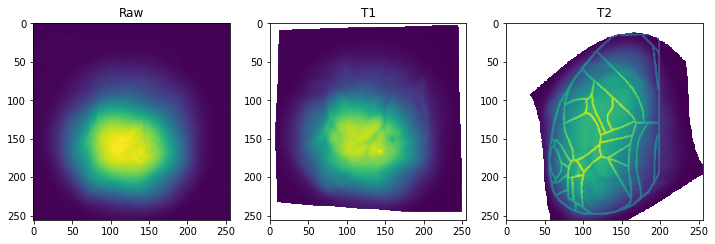

mou_6
-- 20170929
5294976.25
-- 20171010
5012380.113636363
-- 20170926
5023678.25
-- 20171002
4941475.3125
-- 20171009
4798521.136363637
-- 20171012
4904863.409090909
-- 20171004
4967578.181818182
-- 20170928
5141956.770833333
-- 20171011
5020765.2272727275
-- 20170927
5015233.749999999
-- 20170925
5303442.5
-- 20171005
5020275.568181817
-- 20171006
5151932.613636364


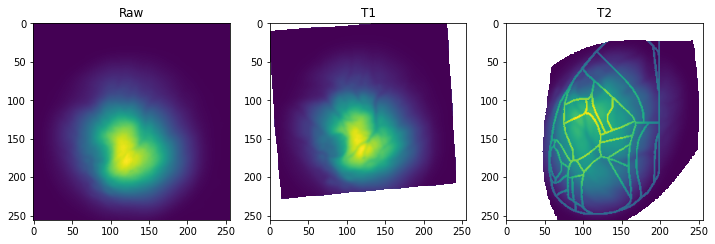

mou_7
-- 20171114
5221205.46875
-- 20171127
5475333.59375
-- 20171115
5173837.03125
-- 20171123
5482156.5625
-- 20171130
5401277.34375
-- 20171128
5469240.15625
-- 20171116
4876905.0
-- 20171129
5217579.531250001
-- 20171122
5287125.78125
-- 20171113
5117864.84375


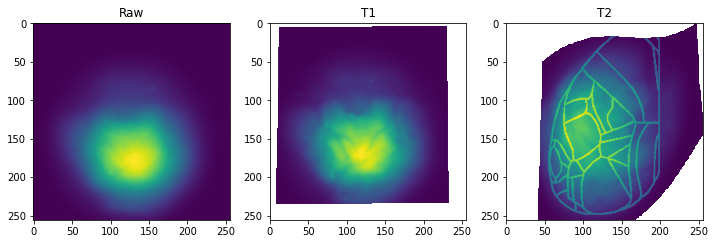

mou_9
-- 20180307
5351509.027777777
-- 20180315
5353055.972222223
-- 20180302
5549239.305555556
-- 20180308
5875469.027777777
-- 20180305
6078845.694444444
-- 20180306
5668847.777777778
-- 20180301
5390063.055555556
-- 20180309
5710152.638888889
-- 20180313
5547086.805555555
-- 20180316
5127740.833333333


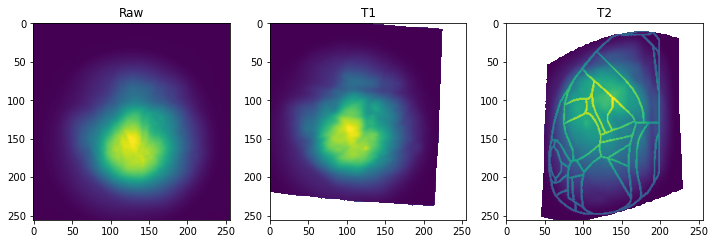

CPU times: user 8.51 s, sys: 5.74 s, total: 14.2 s
Wall time: 14min 42s


In [22]:
%%time
for mousename in sorted(set(prep.dataPaths['mouse'])):
    print(mousename)
    prep.test_transform_vids(mousename)

# 3. Pool-process video files

In [9]:
prep.process_video_files('mou_5', skipExisting=False)

processing 2017_03_06_session01
- 0 / 254
- 1 / 254
- 2 / 254
- 3 / 254
- 4 / 254
- 5 / 254
- 6 / 254
- 7 / 254
- 8 / 254
- 9 / 254
- 10 / 254
- 11 / 254
- 12 / 254
- 13 / 254
- 14 / 254
- 15 / 254
- 16 / 254
- 17 / 254
- 18 / 254
- 19 / 254
- 20 / 254
- 21 / 254
- 22 / 254
- 23 / 254
- 24 / 254
- 25 / 254
- 26 / 254
- 27 / 254
- 28 / 254
- 29 / 254
- 30 / 254
- 31 / 254
- 32 / 254
- 33 / 254
- 34 / 254
- 35 / 254
- 36 / 254
- 37 / 254
- 38 / 254
- 39 / 254
- 40 / 254
- 41 / 254
- 42 / 254
- 43 / 254
- 44 / 254
- 45 / 254
- 46 / 254
- 47 / 254
- 48 / 254
- 49 / 254
- 50 / 254
- 51 / 254
- 52 / 254
- 53 / 254
- 54 / 254
- 55 / 254
- 56 / 254
- 57 / 254
- 58 / 254
- 59 / 254
- 60 / 254
- 61 / 254
- 62 / 254
- 63 / 254
- 64 / 254
- 65 / 254
- 66 / 254
- 67 / 254
- 68 / 254
- 69 / 254
- 70 / 254
- 71 / 254
- 72 / 254
- 73 / 254
- 74 / 254
- 75 / 254
- 76 / 254
- 77 / 254
- 78 / 254
- 79 / 254
- 80 / 254
- 81 / 254
- 82 / 254
- 83 / 254
- 84 / 254
- 85 / 254
- 86 / 254
- 87 / 254
- 88 / 254

- 128 / 131
- 129 / 131
- 130 / 131
processing 2017_03_14_session02
- 0 / 264
- 1 / 264
- 2 / 264
- 3 / 264
- 4 / 264
- 5 / 264
- 6 / 264
- 7 / 264
- 8 / 264
- 9 / 264
- 10 / 264
- 11 / 264
- 12 / 264
- 13 / 264
- 14 / 264
- 15 / 264
- 16 / 264
- 17 / 264
- 18 / 264
- 19 / 264
- 20 / 264
- 21 / 264
- 22 / 264
- 23 / 264
- 24 / 264
- 25 / 264
- 26 / 264
- 27 / 264
- 28 / 264
- 29 / 264
- 30 / 264
- 31 / 264
- 32 / 264
- 33 / 264
- 34 / 264
- 35 / 264
- 36 / 264
- 37 / 264
- 38 / 264
- 39 / 264
- 40 / 264
- 41 / 264
- 42 / 264
- 43 / 264
- 44 / 264
- 45 / 264
- 46 / 264
- 47 / 264
- 48 / 264
- 49 / 264
- 50 / 264
- 51 / 264
- 52 / 264
- 53 / 264
- 54 / 264
- 55 / 264
- 56 / 264
- 57 / 264
- 58 / 264
- 59 / 264
- 60 / 264
- 61 / 264
- 62 / 264
- 63 / 264
- 64 / 264
- 65 / 264
- 66 / 264
- 67 / 264
- 68 / 264
- 69 / 264
- 70 / 264
- 71 / 264
- 72 / 264
- 73 / 264
- 74 / 264
- 75 / 264
- 76 / 264
- 77 / 264
- 78 / 264
- 79 / 264
- 80 / 264
- 81 / 264
- 82 / 264
- 83 / 264
- 84 / 264
- 85 / 

- 174 / 326
- 175 / 326
- 176 / 326
- 177 / 326
- 178 / 326
- 179 / 326
- 180 / 326
- 181 / 326
- 182 / 326
- 183 / 326
- 184 / 326
- 185 / 326
- 186 / 326
- 187 / 326
- 188 / 326
- 189 / 326
- 190 / 326
- 191 / 326
- 192 / 326
- 193 / 326
- 194 / 326
- 195 / 326
- 196 / 326
- 197 / 326
- 198 / 326
- 199 / 326
- 200 / 326
- 201 / 326
- 202 / 326
- 203 / 326
- 204 / 326
- 205 / 326
- 206 / 326
- 207 / 326
- 208 / 326
- 209 / 326
- 210 / 326
- 211 / 326
- 212 / 326
- 213 / 326
- 214 / 326
- 215 / 326
- 216 / 326
- 217 / 326
- 218 / 326
- 219 / 326
- 220 / 326
- 221 / 326
- 222 / 326
- 223 / 326
- 224 / 326
- 225 / 326
- 226 / 326
- 227 / 326
- 228 / 326
- 229 / 326
- 230 / 326
- 231 / 326
- 232 / 326
- 233 / 326
- 234 / 326
- 235 / 326
- 236 / 326
- 237 / 326
- 238 / 326
- 239 / 326
- 240 / 326
- 241 / 326
- 242 / 326
- 243 / 326
- 244 / 326
- 245 / 326
- 246 / 326
- 247 / 326
- 248 / 326
- 249 / 326
- 250 / 326
- 251 / 326
- 252 / 326
- 253 / 326
- 254 / 326
- 255 / 326
- 256 / 326
- 25

- 165 / 228
- 166 / 228
- 167 / 228
- 168 / 228
- 169 / 228
- 170 / 228
- 171 / 228
- 172 / 228
- 173 / 228
- 174 / 228
- 175 / 228
- 176 / 228
- 177 / 228
- 178 / 228
- 179 / 228
- 180 / 228
- 181 / 228
- 182 / 228
- 183 / 228
- 184 / 228
- 185 / 228
- 186 / 228
- 187 / 228
- 188 / 228
- 189 / 228
- 190 / 228
- 191 / 228
- 192 / 228
- 193 / 228
- 194 / 228
- 195 / 228
- 196 / 228
- 197 / 228
- 198 / 228
- 199 / 228
- 200 / 228
- 201 / 228
- 202 / 228
- 203 / 228
- 204 / 228
- 205 / 228
- 206 / 228
- 207 / 228
- 208 / 228
- 209 / 228
- 210 / 228
- 211 / 228
- 212 / 228
- 213 / 228
- 214 / 228
- 215 / 228
- 216 / 228
- 217 / 228
- 218 / 228
- 219 / 228
- 220 / 228
- 221 / 228
- 222 / 228
- 223 / 228
- 224 / 228
- 225 / 228
- 226 / 228
- 227 / 228
processing 2017_03_22_session01
- 0 / 124
- 1 / 124
- 2 / 124
- 3 / 124
- 4 / 124
- 5 / 124
- 6 / 124
- 7 / 124
- 8 / 124
- 9 / 124
- 10 / 124
- 11 / 124
- 12 / 124
- 13 / 124
- 14 / 124
- 15 / 124
- 16 / 124
- 17 / 124
- 18 / 124
- 19 / 124
- 

- 92 / 197
- 93 / 197
- 94 / 197
- 95 / 197
- 96 / 197
- 97 / 197
- 98 / 197
- 99 / 197
- 100 / 197
- 101 / 197
- 102 / 197
- 103 / 197
- 104 / 197
- 105 / 197
- 106 / 197
- 107 / 197
- 108 / 197
- 109 / 197
- 110 / 197
- 111 / 197
- 112 / 197
- 113 / 197
- 114 / 197
- 115 / 197
- 116 / 197
- 117 / 197
- 118 / 197
- 119 / 197
- 120 / 197
- 121 / 197
- 122 / 197
- 123 / 197
- 124 / 197
- 125 / 197
- 126 / 197
- 127 / 197
- 128 / 197
- 129 / 197
- 130 / 197
- 131 / 197
- 132 / 197
- 133 / 197
- 134 / 197
- 135 / 197
- 136 / 197
- 137 / 197
- 138 / 197
- 139 / 197
- 140 / 197
- 141 / 197
- 142 / 197
- 143 / 197
- 144 / 197
- 145 / 197
- 146 / 197
- 147 / 197
- 148 / 197
- 149 / 197
- 150 / 197
- 151 / 197
- 152 / 197
- 153 / 197
- 154 / 197
- 155 / 197
- 156 / 197
- 157 / 197
- 158 / 197
- 159 / 197
- 160 / 197
- 161 / 197
- 162 / 197
- 163 / 197
- 164 / 197
- 165 / 197
- 166 / 197
- 167 / 197
- 168 / 197
- 169 / 197
- 170 / 197
- 171 / 197
- 172 / 197
- 173 / 197
- 174 / 197
- 175 / 197


- 37 / 270
- 38 / 270
- 39 / 270
- 40 / 270
- 41 / 270
- 42 / 270
- 43 / 270
- 44 / 270
- 45 / 270
- 46 / 270
- 47 / 270
- 48 / 270
- 49 / 270
- 50 / 270
- 51 / 270
- 52 / 270
- 53 / 270
- 54 / 270
- 55 / 270
- 56 / 270
- 57 / 270
- 58 / 270
- 59 / 270
- 60 / 270
- 61 / 270
- 62 / 270
- 63 / 270
- 64 / 270
- 65 / 270
- 66 / 270
- 67 / 270
- 68 / 270
- 69 / 270
- 70 / 270
- 71 / 270
- 72 / 270
- 73 / 270
- 74 / 270
- 75 / 270
- 76 / 270
- 77 / 270
- 78 / 270
- 79 / 270
- 80 / 270
- 81 / 270
- 82 / 270
- 83 / 270
- 84 / 270
- 85 / 270
- 86 / 270
- 87 / 270
- 88 / 270
- 89 / 270
- 90 / 270
- 91 / 270
- 92 / 270
- 93 / 270
- 94 / 270
- 95 / 270
- 96 / 270
- 97 / 270
- 98 / 270
- 99 / 270
- 100 / 270
- 101 / 270
- 102 / 270
- 103 / 270
- 104 / 270
- 105 / 270
- 106 / 270
- 107 / 270
- 108 / 270
- 109 / 270
- 110 / 270
- 111 / 270
- 112 / 270
- 113 / 270
- 114 / 270
- 115 / 270
- 116 / 270
- 117 / 270
- 118 / 270
- 119 / 270
- 120 / 270
- 121 / 270
- 122 / 270
- 123 / 270
- 124 / 270
- 125 /

## 3.1 Test if result is sensible

In [43]:
import h5py 
rez = []
for idx, row in prep.dataPaths.iterrows():
    session = row['day'] + '_' + row['session']
    fpath = os.path.join(pathPreferences, row['mouse'] + '.h5')    
    
    with h5py.File(fpath, 'r') as f:
        dataRSP = np.copy(f['data'][session])
        rez += [np.nanmean(dataRSP, axis=(0, 1))]
        
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame(np.array(rez), columns=np.arange(27)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,3221.412598,15910.560388,306.585788,9024.135766,2376.799289,0.000000,22140.769852,21768.266360,16546.947897,1084.958794,6992.929603,1945.475946,0.0,17321.291324,4242.693231,12434.939762,23562.555216,21490.377800,6988.393074,23555.108253,24263.827904,22713.898768,21542.533605,10558.661846,13980.959078,17688.988805,3671.246366
1,3200.693102,15744.182301,307.161251,8941.641428,2365.836536,0.000000,21847.831421,21507.404636,16307.955194,1086.622787,6907.105914,1944.079321,0.0,17125.422618,4192.651017,12270.718182,23215.150827,21178.738467,6917.884323,23287.335758,23928.093095,22396.806265,21321.227033,10429.357769,13822.276222,17489.429063,3654.151054
2,3707.556342,16425.182837,536.141628,9429.528271,2707.823005,0.000000,22927.066022,21544.686412,18613.426930,1459.300666,6999.230429,2178.976534,0.0,16204.933736,3875.635408,14045.666074,24096.617883,22449.020195,8169.584937,22654.154779,24044.654243,23189.931281,19923.691639,9599.055291,13307.451204,16580.521474,4586.993026
3,3712.070372,16600.524259,536.454571,9472.500444,2712.330779,0.000000,23191.094613,21768.373185,18730.194880,1460.438704,7021.755121,2183.660192,0.0,16298.991329,3893.296665,14137.620390,24362.353048,22662.223076,8216.244326,22811.552629,24282.245930,23454.055033,20066.260600,9662.455530,13404.236187,16683.404410,4615.542794
4,4909.362194,18336.844748,548.732579,12079.528314,3531.235405,0.000000,22063.818044,22541.086285,17557.013158,1582.659223,9579.602454,2585.619443,0.0,18828.239726,4817.235367,12747.270280,23043.777181,21006.062667,6887.091649,22895.667231,23232.378497,21804.041088,20954.487380,10908.740980,13438.634485,16714.275701,3358.417970
5,5412.536201,18020.717997,591.707923,12427.144806,4148.134624,0.000000,21770.760924,22134.168192,16305.659341,1725.473671,10685.681645,2931.914485,0.0,19256.841122,5511.210005,11405.698833,22437.510786,19977.698857,6231.923188,22781.096959,22707.265251,20960.809663,20963.157978,12164.629205,13622.014130,16706.872139,3210.042596
6,3149.789975,13901.656539,522.351660,7678.081454,2416.379086,0.000000,20316.701321,19041.552544,16911.951277,1405.936145,5902.664091,2058.905622,0.0,13821.988706,3327.375067,13169.508774,21942.059622,20570.930536,7992.628319,20669.768590,22050.958110,21578.025874,18021.445500,8528.330583,12239.811184,15505.311383,4911.867838
7,3145.343393,13987.378633,521.782196,7694.650570,2409.032957,0.000000,20439.424445,19120.137471,16958.962667,1404.322590,5885.648048,2056.241043,0.0,13818.461037,3323.797609,13223.253760,22071.855110,20678.689703,8032.194770,20732.888370,22183.193490,21689.546052,18074.491337,8535.008311,12277.970683,15527.723612,4926.205669
8,3130.054743,13843.875554,521.857191,7619.061798,2402.893803,0.000000,20295.366892,18924.399879,16840.561418,1403.883004,5838.339677,2054.277351,0.0,13642.851669,3299.813928,13133.902409,21917.007506,20538.301907,7986.878540,20534.193125,22004.391008,21541.503088,17908.639805,8476.673128,12190.930885,15424.785338,4916.649755
9,4078.629784,15702.022719,551.558088,9605.058876,2976.822618,0.000000,20330.297854,19947.002226,17333.724074,1517.716841,7711.222946,2274.630826,0.0,15259.291112,3766.888516,13121.827119,21579.628290,20291.928517,7546.124758,20559.286724,21547.060910,21146.728689,18227.792712,9051.210401,12065.531446,15192.926965,4168.923523


# 4. Pull trial types and times

* Also compute d'

In [12]:
prep.process_metadata_files()

already processed mou_5 2017_03_06_session01
already processed mou_5 2017_03_06_session02
already processed mou_5 2017_03_13_session01
already processed mou_5 2017_03_13_session02
already processed mou_5 2017_03_14_session02
already processed mou_5 2017_03_15_session01
already processed mou_5 2017_03_16_session01
already processed mou_5 2017_03_16_session02
already processed mou_5 2017_03_16_session03
already processed mou_5 2017_03_17_session01
already processed mou_5 2017_03_22_session01
already processed mou_5 2017_03_22_session03
already processed mou_5 2017_03_22_session04
already processed mou_5 2017_03_23_session01
already processed mou_5 2017_03_23_session02
already processed mou_5 2017_03_24_session01
already processed mou_5 2017_03_24_session02
already processed mou_5 2017_03_24_session03
already processed mou_5 2017_03_28_session01
already processed mou_5 2017_03_29_session01
already processed mou_5 2017_03_29_session02
already processed mou_6 20170925_a
already processed mo

/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '20171113_a'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/pandas/core/generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['time_stamp', 'reward_time', 'decision_time', 'trialType'], dtype='object')]

  pytables.to_hdf(
/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '20171114_a'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this ob

/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '20171130_a'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '20171130_b'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '20171130_c'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``get

/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/tables/path.py:155: NaturalNameWarning: object name is not a valid Python identifier: '20180316_b'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [17]:
for idx, row in prep.dataPaths.iterrows():
    session = row['day'] + '_' + row['session']
    fpath = row['mouse'] + '.h5'
    df = pd.read_hdf(fpath, '/metadata/' + session)
    display(df.head())

,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,14:58:05.0313,3145.1,8988.5,8989.5,11676.6,Hit
1,14:58:20.8752,2885.1,Early,Early,10246.6,Early
2,14:58:35.2460,2874.2,NaN,9595.5,12350.7,CR
3,14:58:51.7219,2890.2,7987.5,7988.5,10615.6,Hit
4,14:59:06.4588,2872.1,7863.4,7864.4,10493.6,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:05:45.6845,2866.2,7865.5,7867.5,10510.6,Hit
1,16:06:00.3184,2875.1,NaN,9600.5,12357.7,CR
2,16:06:16.8043,2870.2,7968.5,7970.5,10613.6,Hit
3,16:06:31.5441,2874.2,NaN,9586.6,12362.7,CR
4,16:06:48.0351,2876.1,NaN,9618.5,12347.7,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:56:50.1378,3166.2,8159.5,8161.5,10819.7,Hit
1,16:57:05.1107,2933.2,NaN,9671.6,12410.7,CR
2,16:57:21.6466,2869.2,7800.5,7802.5,10437.6,Hit
3,16:57:36.2065,2871.1,NaN,9586.5,12327.7,CR
4,16:57:52.6594,2871.2,7957.5,7958.5,10591.6,Hit


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,17:55:49.3463,2884.1,11608.6,Early,Early,Early
1,17:56:05.0812,2872.1,10534.6,7884.4,7886.4,Hit
2,17:56:19.7370,2872.2,12315.7,NaN,9593.6,CR
3,17:56:36.1790,2873.1,10421.5,7782.4,7784.4,Hit
4,17:56:50.7278,2870.1,12336.7,NaN,9570.5,CR


,decision_time,time_stamp,end_time,reward_time,stimulus_time,trialType
0,Early,15:32:35.6336,11536.7,Early,2900.2,Early
1,7721.4,15:32:51.2895,10366.6,7719.4,2871.2,Hit
2,9594.6,15:33:05.7803,12324.7,NaN,2874.2,CR
3,Early,15:33:22.2323,10764.6,Early,2874.1,Early
4,Early,15:33:37.1281,11400.7,Early,2869.2,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,12:16:52.3683,2896.2,7942.5,7946.5,10569.6,Hit
1,12:17:07.0652,2870.1,NaN,7882.4,12538.7,FA
2,12:17:23.7291,2875.2,NaN,7976.5,12682.8,FA
3,12:17:40.5391,2869.2,NaN,7874.4,12547.7,FA
4,12:17:57.2121,2871.1,Early,Early,11709.6,Early


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,13:45:04.0299,2873.1,11757.6,Early,Early,Early
1,13:45:19.9178,2868.1,10358.6,Early,Early,Early
2,13:45:34.3986,2870.2,10518.6,Early,Early,Early
3,13:45:49.0414,2871.2,10011.6,Early,Early,Early
4,13:46:03.1773,2874.1,10528.6,7883.4,7884.4,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,15:14:29.7876,3155.2,8350.5,8352.5,10994.6,Hit
1,15:14:44.9115,2878.1,NaN,8102.4,12772.7,FA
2,15:15:01.8074,2870.2,NaN,7921.5,12558.8,FA
3,15:15:18.4894,2871.2,NaN,9596.5,12341.7,CR
4,15:15:34.9533,2874.2,7915.5,7917.5,10648.6,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:05:36.6000,2877.2,7817.5,7819.5,10453.6,Hit
1,16:05:51.1799,2870.1,NaN,9577.5,15559.8,CR
2,16:06:10.8630,2872.1,7720.4,7728.4,10378.6,Hit
3,16:06:25.3678,2873.2,Early,Early,11855.7,Early
4,16:06:41.3477,2870.2,7825.5,7827.5,10480.6,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,08:49:44.8651,3146.2,8094.4,8095.4,10727.6,Hit
1,08:49:59.7249,2872.2,NaN,9590.6,12337.7,CR
2,08:50:16.1859,2875.1,NaN,7980.4,12643.7,FA
3,08:50:32.9548,2873.2,Early,Early,11906.7,Early
4,08:50:48.9868,2869.1,Early,Early,11711.6,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,12:38:54.4142,3159.2,8397.5,8400.5,11016.6,Hit
1,12:39:09.5831,2876.1,NaN,9610.5,12410.7,CR
2,12:39:26.1230,2889.2,NaN,9608.6,12330.7,CR
3,12:39:42.5770,2870.1,Early,Early,11746.6,Early
4,12:39:58.4409,2871.1,Early,Early,11264.6,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:23:54.1266,2903.2,9643.6,NaN,12160.7,Miss
1,13:24:10.4256,2871.1,9624.5,NaN,12345.7,CR
2,13:24:26.8955,2872.2,8186.5,8184.5,10825.6,Hit
3,13:24:41.8434,2870.1,9621.5,NaN,12335.7,CR
4,13:24:58.2993,2875.2,9626.6,NaN,12406.7,CR


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,14:18:18.0013,2874.2,10805.6,Early,Early,Early
1,14:18:32.9362,2869.1,10511.6,7876.4,7878.4,Hit
2,14:18:47.5760,2872.2,12318.7,NaN,9595.6,CR
3,14:19:04.0229,2876.2,10671.7,8040.5,8041.5,Hit
4,14:19:18.8228,2871.2,12330.7,NaN,9594.5,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,11:19:38.8034,3184.2,8207.4,8209.4,10895.6,Hit
1,11:19:53.8532,2879.2,NaN,9602.6,12595.8,CR
2,11:20:10.6062,2870.2,NaN,9587.5,12326.7,CR
3,11:20:27.0591,2872.2,7943.5,7944.5,10581.6,Hit
4,11:20:41.7680,2877.1,Early,Early,10156.6,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,11:59:22.2327,2878.2,8397.5,8399.5,11046.6,Hit
1,11:59:37.4046,2875.1,NaN,9633.5,12376.7,CR
2,11:59:53.9095,2870.2,8118.5,8121.5,10750.6,Hit
3,12:00:08.7844,2868.1,8286.4,8288.4,10925.6,Hit
4,12:00:23.8332,2875.2,NaN,9614.6,12337.7,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,11:04:34.8714,3187.2,8399.5,8403.5,11050.6,Hit
1,11:04:50.0662,2879.2,NaN,9607.6,12321.7,CR
2,11:05:06.5142,2876.1,7889.4,7890.4,10543.6,Hit
3,11:05:21.1790,2874.2,7719.5,7727.5,10377.6,Hit
4,11:05:35.6818,2871.2,NaN,9605.6,12357.8,CR


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,11:49:14.3875,3189.2,12144.7,Early,Early,Early
1,11:49:30.6944,2878.2,10779.6,8129.5,8134.5,Hit
2,11:49:45.5993,2871.1,12352.7,NaN,9622.5,CR
3,11:50:02.0762,2870.2,11360.7,8743.5,8745.5,Hit
4,11:50:17.5571,2870.2,10348.6,7698.5,7701.5,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,12:39:54.6064,2925.2,9665.5,NaN,12147.7,Miss
1,12:40:10.8733,2875.2,9606.6,NaN,12322.7,CR
2,12:40:27.3203,2873.1,Early,Early,11536.6,Early
3,12:40:42.9802,2868.1,9623.5,NaN,12104.6,Miss
4,12:40:59.2071,2876.1,9602.5,NaN,12386.7,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,08:31:49.6163,2875.1,8061.4,8065.4,10699.6,Hit
1,08:32:04.4431,2872.2,NaN,8362.5,13038.8,FA
2,08:32:21.6061,2868.2,NaN,8237.5,12895.7,FA
3,08:32:38.6291,2867.1,NaN,9604.5,12352.7,CR
4,08:32:55.1070,2872.2,NaN,9645.6,12160.7,Miss


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,10:34:46.3306,3154.2,8307.5,8309.5,10918.7,Hit
1,10:35:01.3995,2885.2,NaN,9740.6,12491.7,CR
2,10:35:18.0175,2871.1,NaN,9593.5,12334.7,CR
3,10:35:34.4734,2875.2,NaN,8009.5,12682.7,FA
4,10:35:51.2804,2874.1,Early,Early,11640.6,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,11:47:18.6206,2882.2,7953.4,7955.4,10585.6,Hit
1,11:47:33.3404,2869.2,NaN,9594.6,12309.7,CR
2,11:47:49.7794,2868.1,8004.4,8005.4,10653.6,Hit
3,11:48:04.5612,2873.2,7932.5,7933.5,10559.6,Hit
4,11:48:19.2481,2868.1,NaN,9577.5,12354.7,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:31:37.6321,3160.0,11122,NaN,13885.0,CR
1,13:31:55.6811,2878.0,8734.0,8726,11367.0,Hit
2,13:32:11.1711,2873.0,8972.0,8970.0,11601.0,Hit
3,13:32:26.9021,2868.0,Early,Early,11362.0,Early
4,13:32:42.3871,2866.0,9713.0,9711.0,12357.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:20:26.8141,2871.3,11601.2,NaN,14343.5,CR
1,14:20:45.2840,2871.3,11614.2,NaN,14352.4,CR
2,14:21:03.7648,2869.3,Early,Early,13656.4,Early
3,14:21:21.5466,2868.3,Early,Early,12882.3,Early
4,14:21:38.5493,2873.3,Early,Early,12705.3,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:23:26.6562,2873.0,11608.0,NaN,14358.0,CR
1,15:23:45.1562,2862.0,Early,Early,11339.0,Early
2,15:24:00.6192,2872.0,Early,Early,13703.0,Early
3,15:24:18.4462,2874.0,10089.0,10088.0,12742.0,Hit
4,15:24:35.3132,2871.0,10004.0,10002.0,12634.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:33:48.3574,3159.3,11880.2,NaN,14638.5,CR
1,13:34:07.1353,2874.3,11591.1,NaN,14310.4,CR
2,13:34:25.5681,2873.3,10691.1,NaN,15371.6,FA
3,13:34:45.0611,2872.3,9751.9,9748.9,12379.2,Hit
4,13:35:01.5657,2866.3,10264.0,NaN,14932.5,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:33:35.8053,2873.0,12614.0,NaN,15355.0,CR
1,14:33:55.2863,2872.0,11072.0,11070.0,13707.0,Hit
2,14:34:13.1173,2873.0,12604,NaN,15352.0,CR
3,14:34:32.5923,2876.0,10861.0,10857,13511.0,Hit
4,14:34:50.2283,2879.0,Early,Early,14005.0,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:36:53.1932,2869.3,12589.3,NaN,15330.6,CR
1,15:37:12.6662,2872.3,12598.2,NaN,15359.5,CR
2,15:37:32.1521,2873.3,12604.3,NaN,15108.5,Miss
3,15:37:51.3870,2867.3,12617.3,NaN,15324.6,CR
4,15:38:10.8400,2874.3,11774.2,11773.2,14428.4,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,12:44:47.9829,3152.0,12902.0,NaN,15639.0,CR
1,12:45:07.7879,2885.0,Early,Early,13783.0,Early
2,12:45:25.6979,2868.0,Early,Early,13095.0,Early
3,12:45:42.9159,2868.0,11529.0,11527.0,14174.0,Hit
4,12:46:01.2159,2871.0,12591.0,NaN,15336.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:40:52.9259,2858.3,12595.2,NaN,15340.5,CR
1,13:41:12.3938,2868.3,12588.3,NaN,15326.6,CR
2,13:41:31.8488,2871.3,12595.2,NaN,15327.5,CR
3,13:41:51.3007,2869.3,12598.3,NaN,15135.5,Miss
4,13:42:10.5666,2872.3,12582.3,NaN,15083.5,Miss


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:50:30.3791,2863.0,12588.0,NaN,15343.0,CR
1,14:50:49.8591,2859.0,12620.0,NaN,15359.0,CR
2,14:51:09.3401,2873.0,12610,NaN,15353.0,CR
3,14:51:28.8201,2871.0,10948.0,10947,13584.0,Hit
4,14:51:46.5321,2874.0,12591.0,NaN,15343.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:54:53.8902,3175.3,11824.2,NaN,16475.6,FA
1,13:55:14.5232,2881.3,11338.2,NaN,15997.6,FA
2,13:55:34.6473,2875.2,10796,10794.0,13429.3,Hit
3,13:55:52.2020,2874.3,Early,Early,14589.5,Early
4,13:56:10.9149,2872.3,Early,Early,13653.4,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:00:24.6248,2971.3,13685.4,NaN,16418.7,CR
1,15:00:45.1679,2870.3,12303.2,12300.2,14934.5,Hit
2,15:01:04.2278,2870.3,Early,Early,13388.3,Early
3,15:01:21.7395,2872.3,Early,Early,14977.5,Early
4,15:01:40.8425,2870.2,11914.1,11912.1,14591.4,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,12:30:13.4804,3164.0,12894.0,NaN,15613.0,CR
1,12:30:33.2584,2879.0,12626.0,NaN,15173.0,Miss
2,12:30:52.5564,2876.0,11010.0,11008.0,13637.0,Hit
3,12:31:10.3174,2871.0,11508,NaN,16179.0,FA
4,12:31:30.6164,2870.0,12598.0,NaN,15343.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:19:36.3305,2901.3,13607.4,NaN,16332.7,CR
1,13:19:56.7946,2873.3,Early,Early,14329.4,Early
2,13:20:15.2504,2874.3,Early,Early,15051.5,Early
3,13:20:34.4254,2872.2,Early,Early,15676.5,Early
4,13:20:54.2233,2875.3,Early,Early,14293.5,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:04:59.8496,2876.0,14586.0,NaN,17336.0,CR
1,14:05:21.3136,2869.0,14599.0,NaN,17330.0,CR
2,14:05:42.7646,2870.0,13343.0,13340.0,16002.0,Hit
3,14:06:02.8896,2873.0,14583,NaN,17335.0,CR
4,14:06:24.3456,2873.0,14638.0,NaN,17370.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,12:30:22.2843,3150.0,13867.0,NaN,16594.0,CR
1,12:30:43.0333,2874.0,13625,NaN,16345.0,CR
2,12:31:03.4983,2866.0,13602,NaN,16081.0,Miss
3,12:31:23.7033,2904.0,13658.0,NaN,16160.0,Miss
4,12:31:43.9863,2874.0,13157.0,NaN,17841.0,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:01:24.8739,2871.7,13614.6,NaN,16320.4,CR
1,14:01:45.3238,2872.8,Early,Early,12051.8,Early
2,14:02:01.4982,2872.7,Early,Early,14508.6,Early
3,14:02:20.1264,2875.7,Early,Early,14537.5,Early
4,14:02:38.7825,2875.7,Early,Early,14480.6,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,16:06:33.3067,3171.0,12885.0,NaN,15622.0,CR
1,16:06:53.0817,2876.0,12603.0,NaN,15349.0,CR
2,16:07:12.5557,2870.0,11140.0,11138,13782.0,Hit
3,16:07:30.4627,2866.0,Early,Early,13539.0,Early
4,16:07:48.1237,2868.0,11101,NaN,15750.0,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,16:14:15.9439,3167.6,12897.7,NaN,15631.4,CR
1,16:14:35.7379,2877.7,11281.9,11279.9,13916.6,Hit
2,16:14:53.7831,2870.7,11159.9,11157.9,13790.6,Hit
3,16:15:11.7013,2871.7,12600.7,NaN,15102.5,Miss
4,16:15:30.9284,2876.7,Early,Early,12562.7,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,16:51:57.5157,2984.0,12714.0,NaN,15434.0,CR
1,16:52:17.0957,2884.0,11068.0,11067,13693.0,Hit
2,16:52:34.9177,2868.0,11032.0,11030.0,13665.0,Hit
3,16:52:52.7097,2868.0,12584.0,NaN,15321.0,CR
4,16:53:12.1567,2872.0,11052,11051.0,13667.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,10:43:53.3417,3196.0,11645.5,NaN,16347.9,FA
1,10:44:13.8389,2885.8,12616.8,NaN,15338.6,CR
2,10:44:33.3077,2872.9,11316.9,11314.9,13944.4,Hit
3,10:44:51.3750,2870.5,Early,Early,12200.4,Early
4,10:45:07.7032,2874.6,11873.4,NaN,16519.3,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,11:38:32.4379,2874.3,12619.3,NaN,15357.5,CR
1,11:38:51.9239,2871.2,12618.2,NaN,15346.5,CR
2,11:39:11.3968,2871.3,12604.3,NaN,15328.5,CR
3,11:39:30.8517,2870.3,11194.2,11191.2,13833.4,Hit
4,11:39:48.8115,2901.3,12614.3,NaN,15325.6,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:55:52.3026,3167.3,12153.2,NaN,16837.7,FA
1,14:56:13.2787,2882.3,11102.1,NaN,15753.6,FA
2,14:56:33.1587,2868.3,Early,Early,13072.3,Early
3,14:56:50.3574,2876.3,11014.1,11012.1,13644.4,Hit
4,14:57:08.1312,2867.3,Early,Early,13552.3,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:45:00.5820,2894.0,12646.0,NaN,15390.0,CR
1,15:45:20.0940,2873.0,10941.0,10939,13573.0,Hit
2,15:45:37.7930,2874.0,10955.0,10954,13601.0,Hit
3,15:45:55.5170,2877.0,11029.0,11027.0,13650.0,Hit
4,15:46:13.2910,2876.0,Early,Early,10877.0,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:49:41.1504,3167.3,11539.1,NaN,16221.6,FA
1,15:50:01.5284,2873.3,10983.1,10980.1,13635.4,Hit
2,15:50:19.2902,2865.3,11132.1,NaN,15805.6,FA
3,15:50:39.2212,2873.3,12562.3,NaN,15295.5,CR
4,15:50:58.6421,2870.3,10993.1,10991.1,13645.4,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,16:40:17.5293,2874.0,12577.0,NaN,15287.0,CR
1,16:40:36.9383,2874.0,11100.0,11098.0,13755.0,Hit
2,16:40:54.8193,2872.0,10952.0,10949.0,13593.0,Hit
3,16:41:12.5343,2874.0,10963,10961,13610.0,Hit
4,16:41:30.2703,2878.0,12656.0,NaN,15387.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,17:15:46.7053,2875.1,12620.0,NaN,15358.1,CR
1,17:16:06.1890,2873.2,10911.4,10908.4,13532.5,Hit
2,17:16:23.8491,2876.2,12602.0,NaN,15299.1,CR
3,17:16:43.2719,2879.1,10989.4,10987.4,13624.4,Hit
4,17:17:01.0190,2873.1,Early,Early,10895.3,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,13:17:23.9378,3174.0,12943.0,NaN,15683.0,CR
1,13:17:43.7818,2881.0,12611.0,NaN,15348.0,CR
2,13:18:03.2538,2870.0,12596,NaN,15345.0,CR
3,13:18:22.7258,2868.0,11093.0,11092.0,13727.0,Hit
4,13:18:40.5778,2870.0,12568.0,NaN,15286.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:06:33.8189,3147.3,13876.4,NaN,16608.7,CR
1,14:06:54.5900,2890.3,Early,Early,14020.4,Early
2,14:07:12.7358,2863.3,Early,Early,15288.5,Early
3,14:07:32.1468,2865.2,11994.2,11993.2,14634.4,Hit
4,14:07:50.9076,2871.3,13593.4,NaN,16383.7,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:04:39.4138,2865.0,14608.0,NaN,17332.0,CR
1,15:05:00.8698,2872.0,Early,Early,16439.0,Early
2,15:05:21.4308,2860.0,12936.0,12935.0,15553.0,Hit
3,15:05:41.1038,2870.0,12867.0,12865.0,15512.0,Hit
4,15:06:00.7388,2872.0,14597.0,NaN,17100.0,Miss


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,17:35:08.7438,2870.0,12605,NaN,15337.0,CR
1,17:35:28.2048,2880.0,11107,NaN,15753.0,FA
2,17:35:48.0818,2872.0,12595.0,NaN,15329.0,CR
3,17:36:07.5318,2874.0,Early,Early,12436.0,Early
4,17:36:24.0908,2873.0,11131,11129.0,13749.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,18:08:14.9181,2886.3,12605.3,NaN,15379.5,CR
1,18:08:34.4481,2873.2,12606.2,NaN,15351.5,CR
2,18:08:53.9240,2875.3,11171.1,11169.1,13825.4,Hit
3,18:09:11.8738,2876.3,10962.1,10959.1,13635.4,Hit
4,18:09:29.6356,2872.3,10704.0,NaN,15374.5,FA


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,15:39:50.1415,3217.0,11216.0,Early,Early,Early
1,15:40:05.5245,2883.0,9923.0,7253,7256,Hit
2,15:40:19.5795,2895.0,12323.0,NaN,7660,FA
3,15:40:36.0245,2871.0,11455.0,NaN,8708.0,CR
4,15:40:51.6025,2868.0,9930.0,Early,Early,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,15:36:30.9960,3133.0,7300.0,7302.0,9953.0,Hit
1,15:36:45.1150,2881.0,NaN,8752.0,11509.0,CR
2,15:37:00.7530,2866.0,NaN,8711,11489.0,CR
3,15:37:16.3630,2869.0,6827.0,6832.0,9475.0,Hit
4,15:37:29.9640,2880.0,Early,Early,10473.0,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:47:30.4521,2858.2,6992.7,6993.7,9629.9,Hit
1,16:47:44.2154,2867.3,NaN,7088.7,11725.2,FA
2,16:48:00.0680,2871.3,NaN,8707.9,11443.2,CR
3,16:48:15.6406,2869.3,NaN,8719.8,11457.1,CR
4,16:48:31.2241,2872.3,Early,Early,10924.1,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,17:52:23.1370,2910.0,Early,Early,10412.0,Early
1,17:52:37.6760,2872.0,Early,Early,10048.0,Early
2,17:52:51.8510,2865.0,Early,Early,10211.0,Early
3,17:53:06.1870,2869.0,Early,Early,10728.0,Early
4,17:53:21.0430,2867.0,6808,6815.0,9432.0,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,15:11:45.2745,3141.0,7419.0,7421.0,10048.0,Hit
1,15:11:59.5025,2861.0,NaN,8707.0,11416.0,CR
2,15:12:15.0415,2872.0,7111.0,7113,9753.0,Hit
3,15:12:28.9195,2874.0,NaN,8696.0,11419.0,CR
4,15:12:44.4655,2867.0,7011.0,7013.0,9618.0,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,15:46:14.5108,2876.3,7106.7,7109.7,9749.0,Hit
1,15:46:28.3862,2870.3,NaN,8727.8,11465.1,CR
2,15:46:43.9777,2864.3,7242.8,7244.8,9893.0,Hit
3,15:46:57.9961,2869.3,7084.7,7086.7,9713.0,Hit
4,15:47:11.8325,2874.3,NaN,8706.9,11181.1,Miss


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:16:24.0247,2865.3,7064.7,7065.7,9704.0,Hit
1,16:16:37.8551,2872.3,NaN,8716.9,11433.1,CR
2,16:16:53.4157,2875.2,NaN,7045.7,11693.1,FA
3,16:17:09.2372,2865.3,NaN,8715.9,11449.2,CR
4,16:17:24.8178,2865.3,6918.7,6920.7,9531.9,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:55:57.5941,2874.0,7159.0,7160.0,9812.0,Hit
1,16:56:11.5321,2873.0,NaN,8893,11633.0,CR
2,16:56:27.2871,2873.0,Early,Early,10933.0,Early
3,16:56:42.3471,2875.0,Early,Early,11090.0,Early
4,16:56:57.5601,2887.0,7207.0,7208.0,9835.0,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,14:31:00.1717,2873.3,NaN,8820.9,11322.1,Miss
1,14:31:15.6173,2873.2,7889.7,7892.7,10516.0,Hit
2,14:31:30.2557,2869.3,NaN,7496.8,12154.2,FA
3,14:31:46.5303,2962.3,NaN,8957.9,11698.2,CR
4,14:32:02.3569,2872.3,NaN,8068.8,12733.3,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,14:15:51.5784,3211.0,9043,NaN,11539.0,Miss
1,14:16:07.2664,2879.0,8711.0,NaN,11209.0,Miss
2,14:16:22.6014,2866.0,8698.0,NaN,11214.0,Miss
3,14:16:37.9404,2911.0,8748.0,NaN,11333.0,Miss
4,14:16:53.4364,2874.0,8701,NaN,11199.0,Miss


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,15:15:44.4586,2864.6,6845.4,6843.4,9478.9,Hit
1,15:15:58.0694,2873.5,6920.3,NaN,11565.3,FA
2,15:16:13.7625,2871.6,7118.4,NaN,11789.4,FA
3,15:16:29.6787,2865.6,8689.7,NaN,11422.3,CR
4,15:16:45.2218,2874.6,Early,Early,10515.1,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,16:14:36.9032,2874.3,7213.7,7211.7,9838.0,Hit
1,16:14:50.8676,2870.3,8677.9,NaN,11391.2,CR
2,16:15:06.3842,2876.3,7234.7,NaN,11887.2,FA
3,16:15:22.3968,2873.3,8719.8,NaN,11466.1,CR
4,16:15:37.9893,2868.3,6817.7,6812.7,9470.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,17:02:52.3379,2868.0,Early,Early,10536.0,Early
1,17:03:07.0089,2871.0,Early,Early,10993.0,Early
2,17:03:22.1289,2879.0,Early,Early,10887.0,Early
3,17:03:37.1439,2864.0,7054.0,7053.0,9692.0,Hit
4,17:03:50.9609,2876.0,7098.0,NaN,11750.0,FA


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,13:51:42.8592,3195.7,7514.3,7516.3,10147.0,Hit
1,13:51:57.1728,2875.7,NaN,7024.3,11681.8,FA
2,13:52:12.9802,2871.7,NaN,7162.3,11828.8,FA
3,13:52:28.9356,2867.7,NaN,7072.3,11710.9,FA
4,13:52:44.7721,2878.7,NaN,8700.1,11436.8,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,14:35:59.1323,3018.0,Early,Early,11111.0,Early
1,14:36:14.3673,2875.0,Early,Early,10614.0,Early
2,14:36:29.1023,2874.0,Early,Early,11002.0,Early
3,14:36:44.2313,2875.0,NaN,8795.0,11287.0,Miss
4,14:36:59.6413,2870.0,Early,Early,10460.0,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,14:33:23.4324,3150.0,7459,7462,10102.0,Hit
1,14:33:37.6594,2888.0,Early,Early,10712.0,Early
2,14:33:52.5084,2883.0,NaN,7089.0,11733.0,FA
3,14:34:08.3664,2875.0,NaN,8724.0,11452.0,CR
4,14:34:23.9474,2869.0,7010.0,7011.0,9648.0,Hit


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,15:11:24.9188,2857.3,6803.7,6807.7,9443.0,Hit
1,15:11:38.4932,2868.3,NaN,7179.7,11826.2,FA
2,15:11:54.4468,2871.3,NaN,8711.9,11410.1,CR
3,15:12:09.9853,2866.3,7065.7,7068.7,9725.0,Hit
4,15:12:23.8387,2871.3,Early,Early,10812.1,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:09:17.4471,2865.3,7069.7,7070.7,9707.9,Hit
1,16:09:31.2845,2868.2,NaN,8717.8,11469.1,CR
2,16:09:46.8840,2868.3,NaN,8692.9,11414.2,CR
3,16:10:02.4256,2864.3,NaN,7237.7,11897.2,FA
4,16:10:18.4532,2864.3,NaN,7026.7,11682.1,FA


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,13:09:51.1058,3188.3,7358.7,7362.7,9998.0,Hit
1,13:10:05.2442,2887.3,NaN,8737.9,11477.2,CR
2,13:10:20.8498,2868.3,NaN,7040.7,11716.1,FA
3,13:10:36.6864,2875.2,NaN,6967.7,11619.1,FA
4,13:10:52.4289,2876.3,NaN,8712.9,11415.2,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,14:13:48.5295,2879.2,7018.9,7019.9,9678.1,Hit
1,14:14:02.3304,2874.1,NaN,7235.8,11891.4,FA
2,14:14:18.3456,2875.1,NaN,8714.4,11448.6,CR
3,14:14:33.9169,2863.2,7027.9,7028.9,9675.1,Hit
4,14:14:47.7158,2873.1,NaN,8716.4,11453.2,CR


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,15:11:37.9198,3151.0,11074.0,Early,Early,Early
1,15:11:53.1568,2876.0,9784.0,7139.0,7142.0,Hit
2,15:12:07.0678,2889.0,11422.0,NaN,8719,CR
3,15:12:22.6188,2872.0,10506.0,Early,Early,Early
4,15:12:37.2488,2876.0,9477.0,6825.0,6832.0,Hit


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,15:58:18.7353,2887.3,10554.0,Early,Early,Early
1,15:58:33.4187,2871.3,10973.1,Early,Early,Early
2,15:58:48.5142,2874.3,10793.1,Early,Early,Early
3,15:59:03.4317,2873.3,10648.1,Early,Early,Early
4,15:59:18.2042,2867.3,9947.0,7337.7,7339.7,Hit


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,17:16:52.1374,2873.0,10860.0,Early,Early,Early
1,17:17:07.1254,2868.0,9630.0,6994.0,6996,Hit
2,17:17:20.8844,2869.0,11651.0,NaN,6991,FA
3,17:17:36.6574,2875.0,11469.0,NaN,8710,CR
4,17:17:52.2544,2870.0,10966.0,Early,Early,Early


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,18:11:24.9336,3173.3,9870.0,7233.7,7235.7,Hit
1,18:11:38.9410,2890.3,11707.2,NaN,7070.7,FA
2,18:11:54.7746,2871.3,11410.1,NaN,8691.8,CR
3,18:12:10.3111,2873.3,11215.2,NaN,8714.9,Miss
4,18:12:25.6497,2892.3,11259.1,NaN,8751.8,Miss


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,18:50:53.3462,2875.7,10641.9,Early,Early,Early
1,18:51:08.1107,2870.7,9597.0,6934.3,6936.3,Hit
2,18:51:21.8333,2870.7,11410.9,NaN,8694.1,CR
3,18:51:37.3677,2870.8,9694.1,7044.3,7046.3,Hit
4,18:51:51.1874,2871.7,10429.9,Early,Early,Early


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,15:07:45.2330,3155.0,7101.0,7106.0,9752.0,Hit
1,15:07:59.1480,2889.0,Early,Early,10176.0,Early
2,15:08:13.4500,2881.0,NaN,6906.0,11569.0,FA
3,15:08:29.1450,2871.0,NaN,6951.0,11633.0,FA
4,15:08:44.9020,2874.0,NaN,8706.0,11453.0,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,16:07:16.5970,2896.3,Early,Early,11001.1,Early
1,16:07:31.7275,2874.3,6909.7,6911.7,9549.0,Hit
2,16:07:45.4009,2875.3,NaN,6959.7,11633.1,FA
3,16:08:01.1604,2874.3,NaN,6925.7,11574.2,FA
4,16:08:16.8650,2873.3,NaN,8732.9,11466.2,CR


,time_stamp,stimulus_time,reward_time,decision_time,end_time,trialType
0,17:10:10.4285,2908.0,Early,Early,10870.0,Early
1,17:10:25.4265,2874.0,Early,Early,10891.0,Early
2,17:10:40.4395,2874.0,6865.0,6868.0,9513.0,Hit
3,17:10:54.0785,2869.0,NaN,6897.0,11551.0,FA
4,17:11:09.7565,2873.0,NaN,8705,11452.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:40:11.3012,5858.6,11056.1,NaN,14697.5,FA
1,09:40:30.1401,2895.3,9642.9,NaN,12383.2,CR
2,09:40:46.6537,2869.3,9594.0,NaN,12075.2,Miss
3,09:41:02.8543,2874.3,7988.8,NaN,11675.2,FA
4,09:41:18.6589,2872.3,9596,NaN,12321.3,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,10:29:41.8029,2871.0,9613,NaN,12359.0,CR
1,10:29:58.2909,2868.0,Early,Early,11192.0,Early
2,10:30:13.6099,2868.0,Early,Early,10958.0,Early
3,10:30:28.6989,2873.0,9576.0,NaN,12312.0,CR
4,10:30:45.1379,2870.0,7962.0,7958.0,10598.0,Hit


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,09:08:32.8021,4713.0,12663.0,Early,Early,Early
1,09:08:49.6531,2987.0,11753.0,NaN,8101.0,FA
2,09:09:05.5311,2877.0,12024.0,NaN,8349,FA
3,09:09:21.6811,2873.0,11636.0,NaN,7989.0,FA
4,09:09:37.4441,2873.0,11912.0,NaN,8264.0,FA


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,09:52:06.6415,2872.0,10811.0,Early,Early,Early
1,09:52:21.5765,2870.0,12337.0,NaN,9599,CR
2,09:52:38.0425,2871.0,12317.0,NaN,9572.0,CR
3,09:52:54.4845,2870.0,12337.0,NaN,9598.0,CR
4,09:53:10.9435,2876.0,12102.0,NaN,9594.0,Miss


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,10:40:37.2263,2876.0,11908.0,NaN,8249.0,FA
1,10:40:53.2613,2864.0,11911.0,NaN,8263.0,FA
2,10:41:09.3003,2879.0,10500.0,Early,Early,Early
3,10:41:23.9243,2871.0,10398.0,7781.0,7783.0,Hit
4,10:41:38.4563,2868.0,10792.0,Early,Early,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:44:35.9162,3288.2,8431.5,NaN,12092.7,FA
1,09:44:52.1771,2883.2,8609.5,NaN,12275.7,FA
2,09:45:08.5780,2876.2,9611.6,NaN,12355.7,CR
3,09:45:25.0610,2869.1,Early,Early,11116.6,Early
4,09:45:40.3059,2871.1,7972.4,7969.4,10631.6,Hit


,time_stamp,stimulus_time,end_time,reward_time,decision_time,trialType
0,10:31:51.4132,2876.7,11383.8,Early,Early,Early
1,10:32:06.9206,2873.7,12353.8,NaN,9616.1,CR
2,10:32:23.3990,2870.7,11613.8,NaN,7966.2,FA
3,10:32:39.1384,2870.7,12333.8,NaN,9599.0,CR
4,10:32:55.5978,2869.7,12096.8,NaN,9583.0,Miss


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:06:57.1987,3157.0,9921.0,NaN,12667.0,CR
1,09:07:14.0027,2879.0,8200,8190.0,10846.0,Hit
2,09:07:28.9767,2881.0,9593.0,NaN,12307.0,CR
3,09:07:45.4097,2869.0,7702.0,7697.0,10351.0,Hit
4,09:07:59.8927,2872.0,7979.0,NaN,11644.0,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:46:13.0677,2871.0,9791.0,NaN,12527.0,CR
1,09:46:29.7227,2885.0,9627.0,NaN,12369.0,CR
2,09:46:46.2157,2876.0,9603.0,NaN,12333.0,CR
3,09:47:02.6777,2870.0,8134,8131,10766.0,Hit
4,09:47:17.5737,2869.0,9598.0,NaN,12306.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:57:48.5105,3324.0,10063.0,NaN,12817.0,CR
1,09:58:05.4889,2890.3,8031.8,8028.8,10680.1,Hit
2,09:58:20.2984,2871.3,7907.8,7903.8,10553.0,Hit
3,09:58:34.9768,2874.3,9620.0,NaN,12360.3,CR
4,09:58:51.4645,2874.3,9599.0,NaN,12351.2,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,10:30:55.7879,2873.0,9599.0,NaN,12335.0,CR
1,10:31:12.2499,2877.0,Early,Early,11159.0,Early
2,10:31:27.5359,2864.0,Early,Early,10288.0,Early
3,10:31:41.9489,2872.0,9607,NaN,12094.0,Miss
4,10:31:58.1669,2877.0,9598.0,NaN,12098.1,Miss


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,11:31:17.6149,2875.3,9598.9,NaN,12323.2,CR
1,11:31:34.0645,2874.3,Early,Early,9721.0,Early
2,11:31:47.9149,2892.3,Early,Early,11412.2,Early
3,11:32:03.4535,2872.3,Early,Early,11594.1,Early
4,11:32:19.1760,2882.3,7765.8,7762.8,10429.1,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,08:19:54.1902,3764.2,10535.6,NaN,13305.7,CR
1,08:20:11.6652,2889.1,9619.5,NaN,12117.7,Miss
2,08:20:27.9061,2874.2,9616.6,NaN,12358.7,CR
3,08:20:44.3910,2874.2,7834.5,7831.5,10454.6,Hit
4,08:20:58.9749,2876.1,Early,Early,11463.6,Early


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:13:48.4299,2876.0,9619,NaN,12336.0,CR
1,09:14:04.9139,2871.0,Early,Early,9836.0,Early
2,09:14:18.8779,2871.1,Early,Early,9975.8,Early
3,09:14:32.9791,2865.3,Early,Early,11268.1,Early
4,09:14:54.8693,2876.3,7799.8,7797.8,10429.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,08:28:18.2562,7765.3,14475.3,NaN,17208.2,CR
1,08:28:39.6591,2881.6,9584.6,NaN,12072.8,Miss
2,08:28:55.8537,2887.7,8875.7,8871.7,11509.7,Hit
3,08:29:11.5332,2928.6,8226.6,8224.6,10861.7,Hit
4,08:29:26.5147,2866.7,9084.3,NaN,12716.3,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:10:09.0286,2880.0,9645,NaN,12384.0,CR
1,09:10:25.5366,2874.0,Early,Early,10522.0,Early
2,09:10:40.1826,2871.0,7844.0,7842.0,10482.0,Hit
3,09:10:54.7896,2882.0,Early,Early,11464.0,Early
4,09:11:10.3786,2874.0,7943,7941.0,10589.0,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,08:18:29.8745,4851.0,11062.7,NaN,14738.0,FA
1,08:18:48.7547,2878.4,9617.1,NaN,12092.6,Miss
2,08:19:04.9734,2921.5,9975,NaN,12691.5,CR
3,08:19:21.7901,2877.4,9570.1,NaN,12306.5,CR
4,08:19:38.2254,2875.0,9589.0,NaN,12314.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:00:21.8172,2872.2,8161.8,NaN,11841.1,FA
1,09:00:37.7898,2869.2,9582.9,NaN,12343.2,CR
2,09:00:54.2594,2868.3,8078.8,8076.8,10714.1,Hit
3,09:01:09.0999,2868.3,9615.9,NaN,12338.2,CR
4,09:01:25.5665,2873.3,8247.9,NaN,11902.2,FA


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:36:37.0179,2872.3,9250.9,NaN,12938.3,FA
1,09:36:54.0836,2877.3,9581.9,NaN,12306.2,CR
2,09:37:10.5172,2871.3,9595,NaN,12094.2,Miss
3,09:37:26.7428,2871.3,9349,NaN,13010.3,FA
4,09:37:43.8796,2873.2,9600.9,NaN,12337.2,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,08:26:11.3407,4903.5,11639.5,NaN,14386.1,CR
1,08:26:29.8564,2876.7,8145.2,8143.2,10736.9,Hit
2,08:26:44.7219,2903.7,9523.0,NaN,13174.7,FA
3,08:27:02.0232,2869.7,9595.0,NaN,12313.7,CR
4,08:27:18.4675,2876.7,8387.2,8384.2,11002.9,Hit


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,08:27:55.8935,4596.0,11325.0,NaN,14051.0,CR
1,08:28:14.0845,2888.0,9617,NaN,12098.0,Miss
2,08:28:30.3075,2878.0,8154,8152.0,10792.0,Hit
3,08:28:45.2265,2881.0,9618.0,NaN,12333.0,CR
4,08:29:01.6875,2874.0,9615,NaN,12333.0,CR


,time_stamp,stimulus_time,decision_time,reward_time,end_time,trialType
0,09:29:45.6544,2877.3,8112.8,NaN,11762.1,FA
1,09:30:01.5470,2882.2,9579.9,NaN,12309.2,CR
2,09:30:17.9856,2873.3,9611.0,NaN,12364.2,CR
3,09:30:34.4783,2877.2,8039.8,8037.8,10658.0,Hit
4,09:30:49.2667,2876.3,9587.0,NaN,12334.3,CR


# 6. Baseline subtraction

# 6.1 Plot stitched session, fit poly

**TODO**:
* Purge mismatching trial counts for trialStruct vs vid:
    - Go over data, delete last
* Very high variance of individual consecutive trials. May render entire idea useless
  - Explore more channels, mice, naive vs expert
  - Compare if Yaro has the same problem
  - Ask Yasir what he thinks about the origin of these fluctuations:
      - Real?
      - Motion artifacts?
      - Sth else?

mou_5 2017_03_29_session01
(270, 180) (270, 180, 27)


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/gallegosalas/preprocess_raw.py:382: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(fpath) as f:


<IPython.core.display.Javascript object>


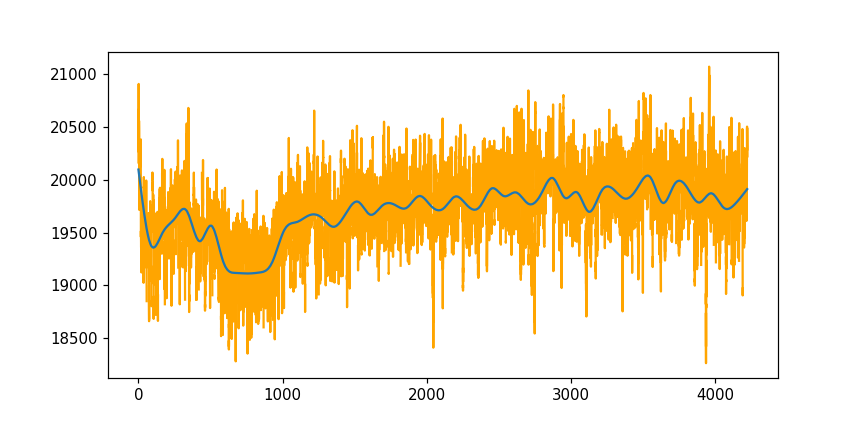

In [56]:
%matplotlib notebook
for idx, row in prep.dataPaths.iterrows():
    try: 
#         session = row['day'] + '_' + row['session']
        session="2017_03_29_session01"
        print(row['mouse'], session)
        prep.example_poly_fit(pathPreferences, row['mouse'], session, ord=50, iCh=6)
    except:
        print('-- Failed')
    break

In [18]:
keys2 = list(set(prep.allen.flatten()))

In [24]:
keys = np.array(sorted(set(prep.allen.flatten()))[2:])
keys

array([ 2,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 30, 32, 34], dtype=uint8)

<IPython.core.display.Javascript object>


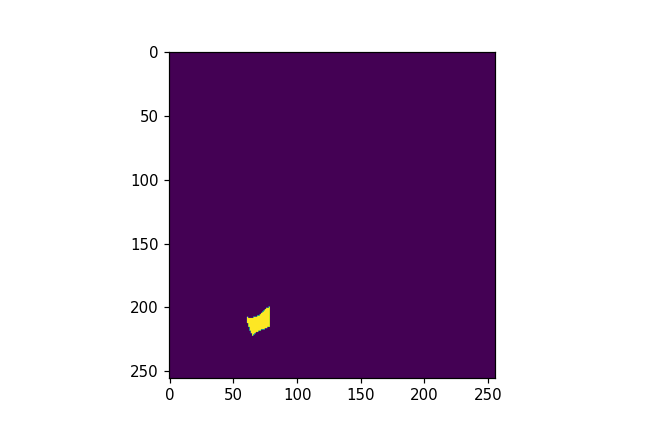

In [53]:
plt.figure()
plt.imshow(prep.allen == keys[2])
plt.show()

# 6.2 Process all sessions

In [44]:
FPS = 20
iMin = 0 * FPS
iMax = 1 * FPS

In [49]:
prep.baseline_subtraction_dff(pathPreferences, iMin, iMax, skipExist=True)

mou_5 2017_03_06_session01
mou_5 2017_03_06_session02
mou_5 2017_03_13_session01
mou_5 2017_03_13_session02
mou_5 2017_03_14_session02
mou_5 2017_03_15_session01
mou_5 2017_03_16_session01


/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/gallegosalas/preprocess_raw.py:382: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(fpath) as f:
/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/gallegosalas/preprocess_raw.py:466: RuntimeWarning: invalid value encountered in true_divide
  h5f['bn_trial'].create_dataset(session, data=dataBN)


mou_5 2017_03_16_session02
mou_5 2017_03_16_session03
mou_5 2017_03_17_session01
mou_5 2017_03_22_session01
mou_5 2017_03_22_session03
mou_5 2017_03_22_session04
mou_5 2017_03_23_session01
mou_5 2017_03_23_session02
mou_5 2017_03_24_session01
mou_5 2017_03_24_session02
mou_5 2017_03_24_session03
mou_5 2017_03_28_session01
mou_5 2017_03_29_session01
mou_5 2017_03_29_session02
mou_6 20170925_a
mou_6 20170925_b
mou_6 20170925_c
mou_6 20170926_a
mou_6 20170926_b
mou_6 20170926_c
mou_6 20170927_a
mou_6 20170927_b
mou_6 20170927_c
mou_6 20170928_a
mou_6 20170928_b
mou_6 20170929_a
mou_6 20170929_b
mou_6 20170929_c
mou_6 20171002_a
mou_6 20171002_c
mou_6 20171004_a
mou_6 20171005_a
mou_6 20171005_b
mou_6 20171006_a
mou_6 20171006_b
mou_6 20171009_a
mou_6 20171009_b
mou_6 20171010_a
mou_6 20171010_b
mou_6 20171010_c
mou_6 20171011_a
mou_6 20171011_b
mou_6 20171011_c
mou_6 20171012_b
mou_6 20171012_c
mou_7 20171113_a
mou_7 20171114_a
mou_7 20171114_b
mou_7 20171114_c
mou_7 20171115_a
mou_7 2017

In [53]:
prep.baseline_subtraction_poly(pathPreferences, ord=50, skipExist=False)

mou_5 2017_03_06_session01 already exists, skipping
mou_5 2017_03_06_session02 already exists, skipping
mou_5 2017_03_13_session01 already exists, skipping
mou_5 2017_03_13_session02 already exists, skipping
mou_5 2017_03_14_session02 already exists, skipping
mou_5 2017_03_15_session01 already exists, skipping
mou_5 2017_03_16_session01 already exists, skipping
mou_5 2017_03_16_session02 already exists, skipping
mou_5 2017_03_16_session03 already exists, skipping
mou_5 2017_03_17_session01 already exists, skipping
mou_5 2017_03_22_session01 already exists, skipping
mou_5 2017_03_22_session03 already exists, skipping
mou_5 2017_03_22_session04 already exists, skipping
mou_5 2017_03_23_session01 already exists, skipping
mou_5 2017_03_23_session02 already exists, skipping
mou_5 2017_03_24_session01 already exists, skipping
mou_5 2017_03_24_session02 already exists, skipping
mou_5 2017_03_24_session03 already exists, skipping
mou_5 2017_03_28_session01 already exists, skipping
mou_5 2017_0

/home/alyosha/work/git/pub-2020-exploratory-analysis/lib/gallegosalas/preprocess_raw.py:382: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(fpath) as f:
